In [293]:
import pandas as pd

In [294]:
df=pd.read_csv("C:/AI workforce/clustering/OnlineRetail.csv",encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [295]:
df.shape

(541909, 8)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [297]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [298]:
df = df.dropna(subset=['CustomerID'])

In [299]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [300]:
df = df[df['Quantity'] > 0]


In [301]:
df = df[df['UnitPrice'] > 0]


In [302]:
df.duplicated().sum()

np.int64(5192)

In [303]:
df = df.drop_duplicates()
df.shape


(392692, 8)

In [304]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [305]:
print(df['InvoiceDate'].dtype) 

datetime64[ns]


In [306]:
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


In [307]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [308]:
df = df.drop(columns=['Description'],axis=1)


In [309]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France


In [310]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

C:\Users\HP\AppData\Local\Temp\ipykernel_14356\2750021627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


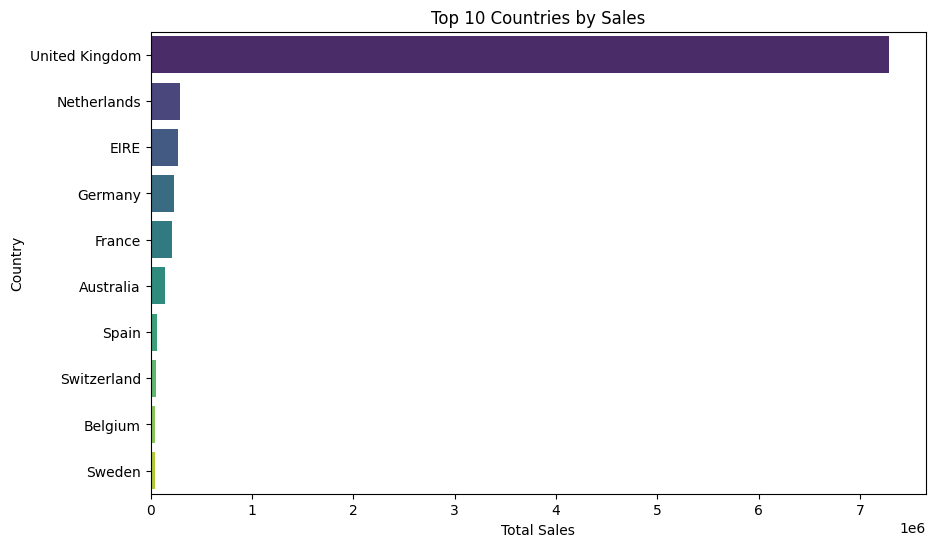

In [311]:
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

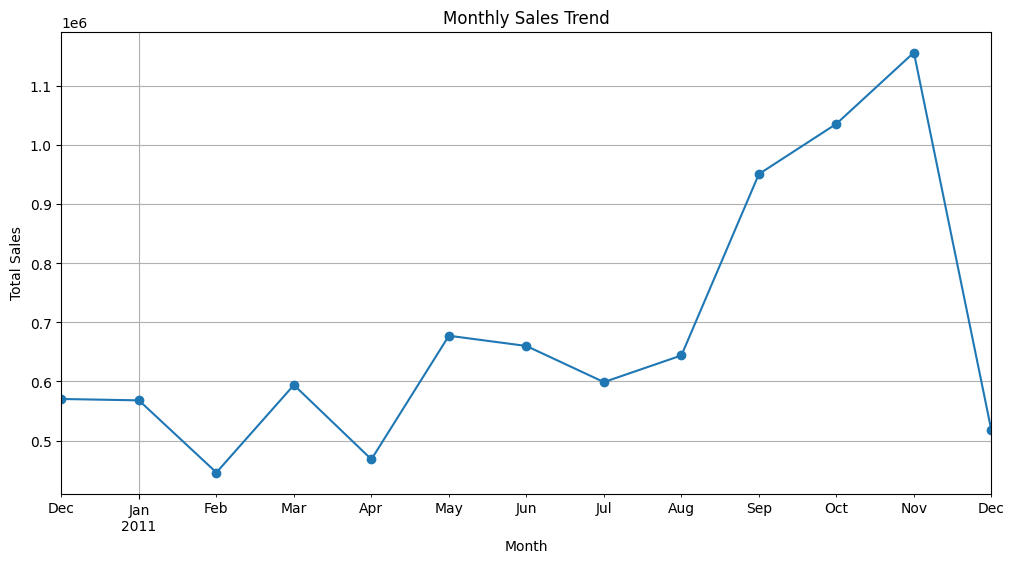

In [312]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14356\2571466673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aov_country.values, y=aov_country.index, palette="coolwarm")


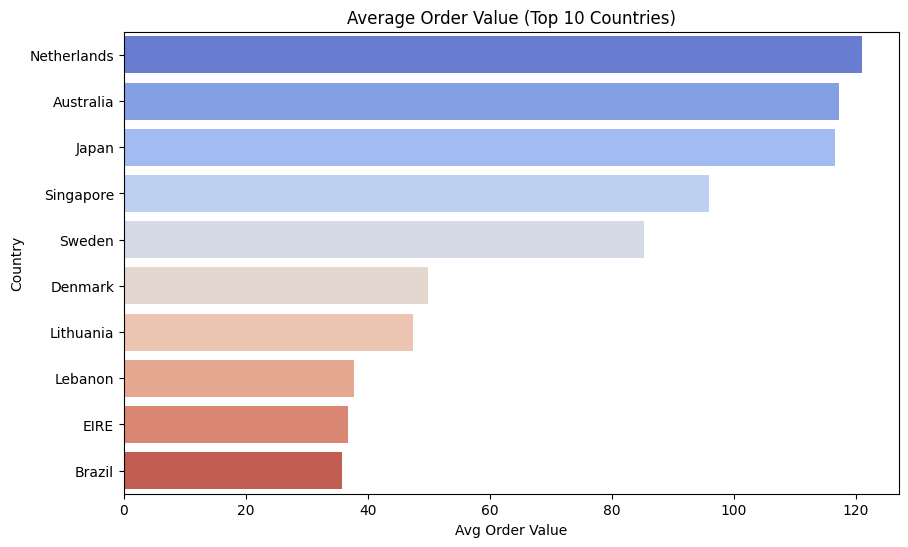

In [313]:
aov_country = df.groupby("Country")["TotalPrice"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=aov_country.values, y=aov_country.index, palette="coolwarm")
plt.title("Average Order Value (Top 10 Countries)")
plt.xlabel("Avg Order Value")
plt.ylabel("Country")
plt.show()

In [314]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
current_date = df['InvoiceDate'].max()

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  
    'InvoiceNo': 'nunique',                                 
    'TotalPrice': 'sum'                                     
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

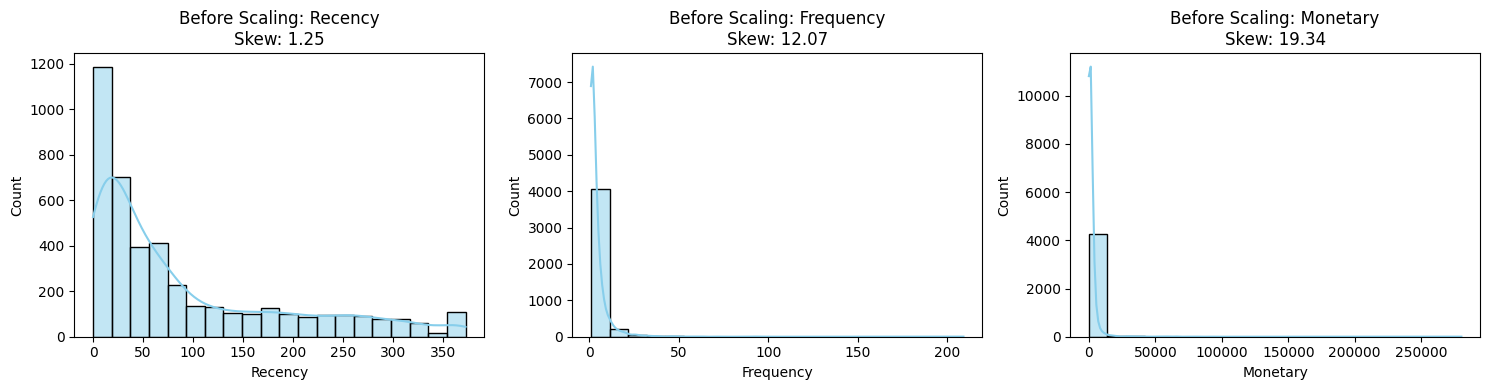

In [315]:
plt.figure(figsize=(15,4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Before Scaling: {col}\nSkew: {rfm[col].skew():.2f}')
plt.tight_layout()
plt.show()

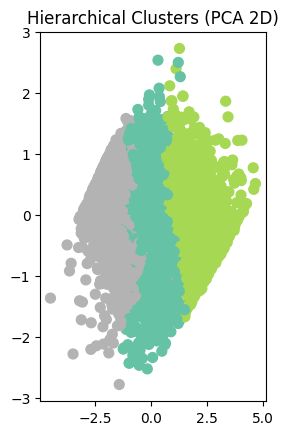

In [ ]:
rfm_scaled["HierCluster"] = hier_labels
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=rfm_scaled["HierCluster"], cmap="Set2", s=50)
plt.title("Hierarchical Clusters (PCA 2D)")

plt.show()

In [316]:
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12



Skew After Yeo-Johnson:
Recency     -0.070378
Frequency    0.216552
Monetary    -0.014299
dtype: float64


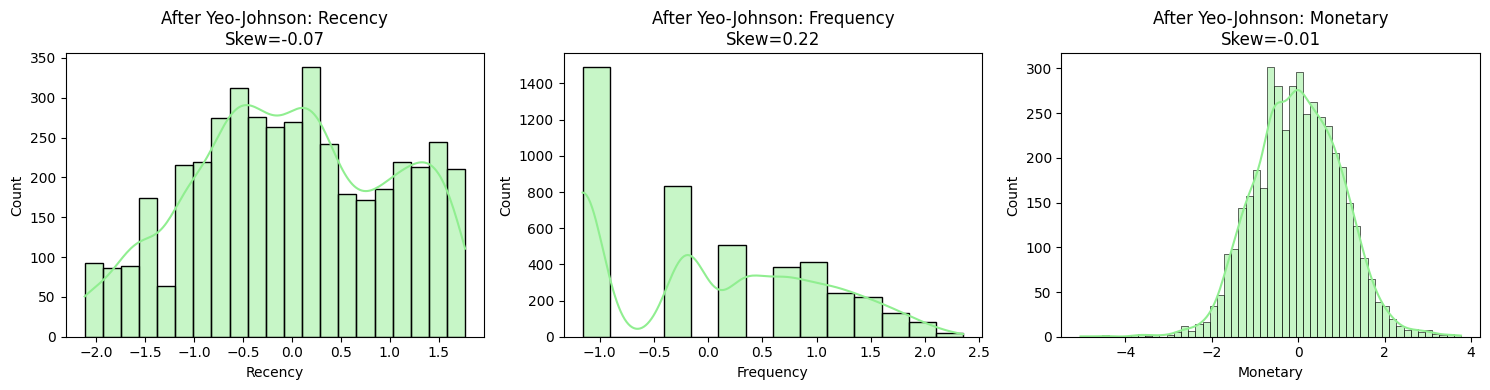

In [317]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
pt = PowerTransformer(method="yeo-johnson")

rfm_transformed = pd.DataFrame(
    pt.fit_transform(rfm[["Recency", "Frequency", "Monetary"]]),
    columns=["Recency", "Frequency", "Monetary"]
)


rfm_transformed["CustomerID"] = rfm["CustomerID"].values


print("\nSkew After Yeo-Johnson:")
print(rfm_transformed[["Recency", "Frequency", "Monetary"]].apply(skew))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(["Recency", "Frequency", "Monetary"]):
    sns.histplot(rfm_transformed[col], kde=True, ax=axes[i], color="lightgreen")
    axes[i].set_title(f"After Yeo-Johnson: {col}\nSkew={round(skew(rfm_transformed[col]), 2)}")
plt.tight_layout()
plt.show()

In [318]:
X = rfm_transformed[["Recency", "Frequency", "Monetary"]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


rfm_scaled = pd.DataFrame(
    X_scaled,
    columns=["Recency", "Frequency", "Monetary"],
    index=rfm_transformed.index
)


rfm_scaled["CustomerID"] = rfm_transformed["CustomerID"].values

print(rfm_scaled.head())

    Recency  Frequency  Monetary  CustomerID
0  1.624870  -1.158367  3.124061       12346
1 -1.841636   1.202090  1.378940       12347
2  0.291210   0.660807  0.755356       12348
3 -0.679354  -1.158367  0.738795       12349
4  1.573275  -1.158367 -0.587198       12350


<Axes: >

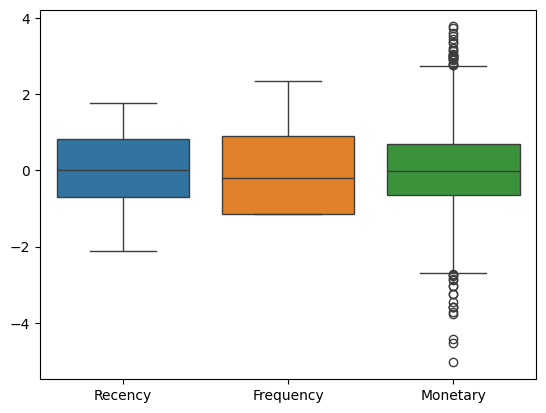

In [319]:
sns.boxplot(data=rfm_scaled[["Recency","Frequency","Monetary"]])


<Axes: >

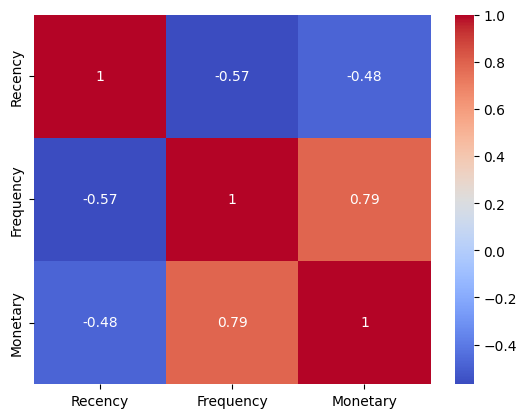

In [320]:
sns.heatmap(rfm_scaled[["Recency","Frequency","Monetary"]].corr(), annot=True, cmap="coolwarm")


In [321]:
X = rfm_scaled

In [322]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
results = {}

# --------------------------
# 1️⃣ K-Means
# --------------------------
kmeans = KMeans(n_clusters=3, random_state=42)   
kmeans_labels = kmeans.fit_predict(X_scaled)

results["KMeans"] = {
    "Silhouette": silhouette_score(X_scaled, kmeans_labels),
    "DBI": davies_bouldin_score(X_scaled, kmeans_labels),
    "CHI": calinski_harabasz_score(X_scaled, kmeans_labels)
}




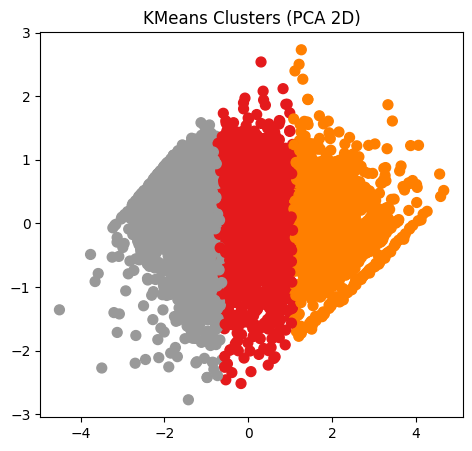

In [323]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


rfm_scaled["KMeansCluster"] = kmeans_labels

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=rfm_scaled["KMeansCluster"], cmap="Set1", s=50)
plt.title("KMeans Clusters (PCA 2D)")
plt.show()


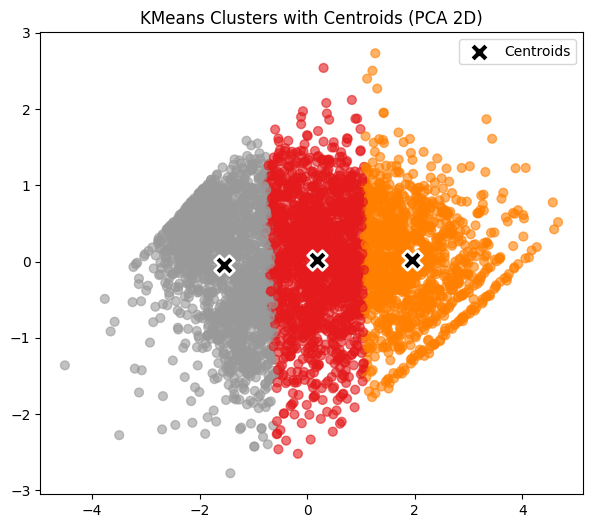

In [324]:
kmeans_labels = kmeans.fit_predict(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)


plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="Set1", s=40, alpha=0.6)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], 
            c="black", marker="X", s=200, edgecolor="white", linewidth=2, label="Centroids")
plt.title("KMeans Clusters with Centroids (PCA 2D)")
plt.legend()
plt.show()

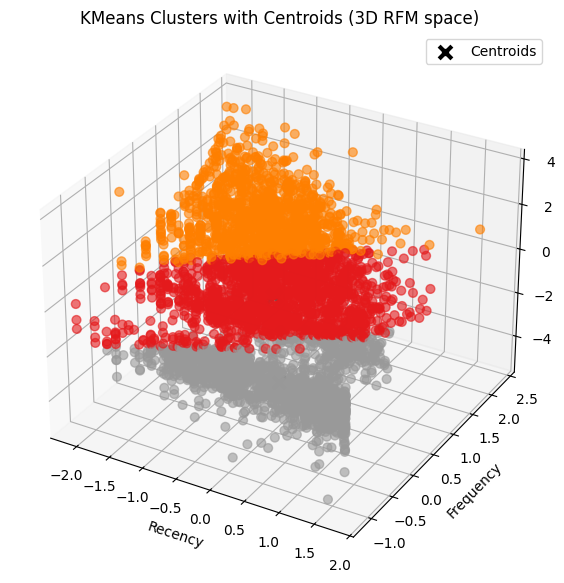

In [325]:

centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_scaled["Recency"], 
           rfm_scaled["Frequency"], 
           rfm_scaled["Monetary"],
           c=kmeans_labels, cmap="Set1", s=40, alpha=0.6)

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c="black", marker="X", s=200, edgecolor="white", linewidth=2, label="Centroids")

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("KMeans Clusters with Centroids (3D RFM space)")
plt.legend()
plt.show()


In [326]:

hier = AgglomerativeClustering(n_clusters=3, linkage="ward")
hier_labels = hier.fit_predict(X_scaled)

results["Hierarchical"] = {
    "Silhouette": silhouette_score(X_scaled, hier_labels),
    "DBI": davies_bouldin_score(X_scaled, hier_labels),
    "CHI": calinski_harabasz_score(X_scaled, hier_labels)
}

results_df = pd.DataFrame(results).T
print(results_df)

              Silhouette       DBI          CHI
KMeans          0.327180  1.095145  3781.341700
Hierarchical    0.309332  1.167095  3537.011117


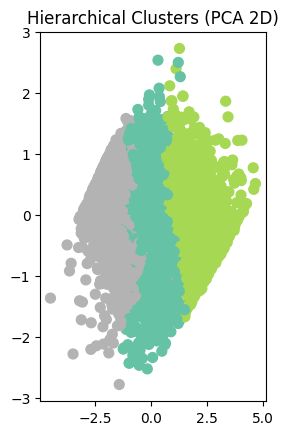

In [327]:
rfm_scaled["HierCluster"] = hier_labels
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=rfm_scaled["HierCluster"], cmap="Set2", s=50)
plt.title("Hierarchical Clusters (PCA 2D)")

plt.show()

In [328]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

results = {}


for k in range(2, 11):
 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    results[f"KMeans_k{k}"] = {
        "Silhouette": silhouette_score(X_scaled, kmeans_labels),
        "DBI": davies_bouldin_score(X_scaled, kmeans_labels),
        "CHI": calinski_harabasz_score(X_scaled, kmeans_labels)
    }
    
    
    hier = AgglomerativeClustering(n_clusters=k, linkage="ward")
    hier_labels = hier.fit_predict(X_scaled)
    
    results[f"Hierarchical_k{k}"] = {
        "Silhouette": silhouette_score(X_scaled, hier_labels),
        "DBI": davies_bouldin_score(X_scaled, hier_labels),
        "CHI": calinski_harabasz_score(X_scaled, hier_labels)
    }


results_df = pd.DataFrame(results).T
results_df




,Silhouette,DBI,CHI
KMeans_k2,0.432301,0.872417,4806.444013
Hierarchical_k2,0.392539,0.852144,3739.164276
KMeans_k3,0.327180,1.095145,3781.341700
Hierarchical_k3,0.309332,1.167095,3537.011117
KMeans_k4,0.333978,1.021921,3583.804619
Hierarchical_k4,0.287168,1.077992,3008.089134
KMeans_k5,0.322755,1.040898,3366.191238
Hierarchical_k5,0.301865,1.073220,2887.508965
KMeans_k6,0.318015,0.980122,3213.435084
Hierarchical_k6,0.277957,1.052627,2688.014044


In [329]:

print("\nBest by Silhouette:")
results_df.sort_values("Silhouette", ascending=False).head()


Best by Silhouette:


,Silhouette,DBI,CHI
KMeans_k2,0.432301,0.872417,4806.444013
Hierarchical_k2,0.392539,0.852144,3739.164276
KMeans_k4,0.333978,1.021921,3583.804619
KMeans_k3,0.327180,1.095145,3781.341700
KMeans_k5,0.322755,1.040898,3366.191238


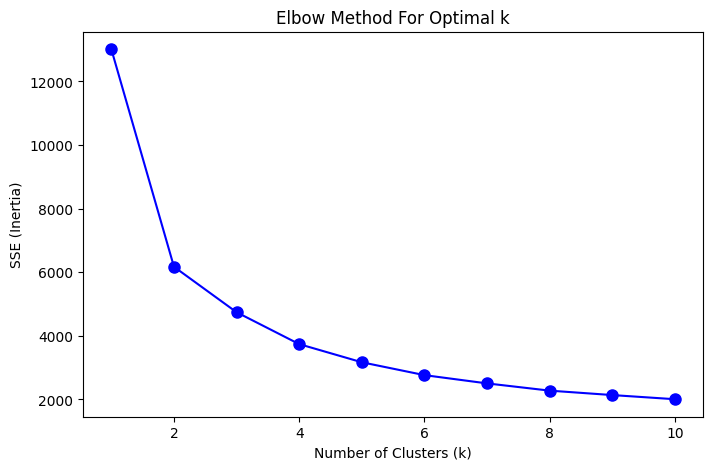

In [330]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = [] 
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, sse, "bo-", markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method For Optimal k")
plt.show()


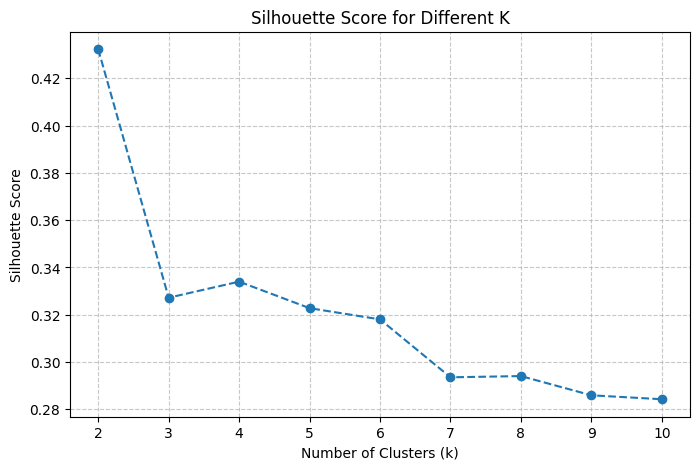

In [331]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try different k values
K = range(2, 11)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker="o", linestyle="--")
plt.title("Silhouette Score for Different K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [332]:
kmeans_final = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

In [333]:
rfm["Cluster"] = kmeans_labels   

In [334]:
cluster_profile = rfm.groupby("Cluster").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "NumCustomers"})

print(cluster_profile)


            Recency  Frequency     Monetary  NumCustomers
Cluster                                                  
0        143.156611   1.468977   427.834657          2337
1         31.248376   7.545727  3941.708796          2001


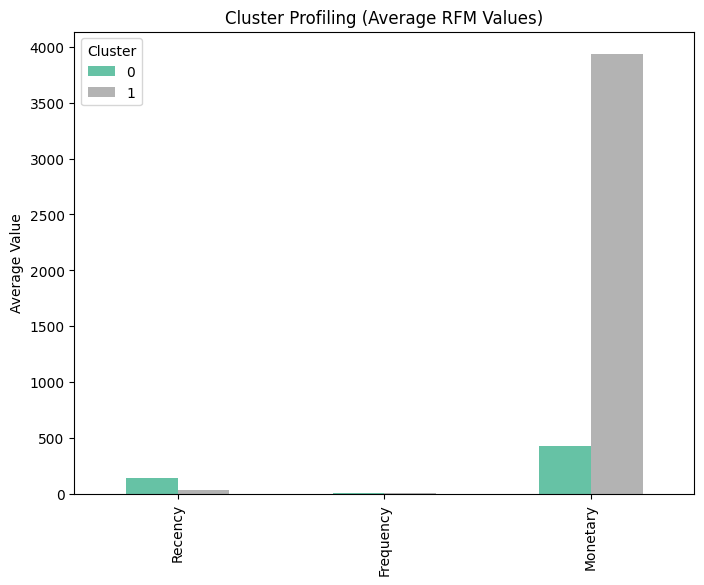

In [335]:
cluster_profile.drop("NumCustomers", axis=1).T.plot(
    kind="bar", figsize=(8,6), colormap="Set2"
)
plt.title("Cluster Profiling (Average RFM Values)")
plt.ylabel("Average Value")
plt.show()

In [336]:

segment_map = {
    0: "Loyal Frequent Buyers",
    1: "VIP Big Spenders"
}


rfm["Segment"] = rfm["Cluster"].map(segment_map)


print(rfm[["CustomerID", "Recency", "Frequency", "Monetary", "Cluster", "Segment"]].head())


rfm.to_csv("Customer_Segments.csv", index=False)


   CustomerID  Recency  Frequency  Monetary  Cluster                Segment
0       12346      325          1  77183.60        1       VIP Big Spenders
1       12347        1          7   4310.00        1       VIP Big Spenders
2       12348       74          4   1797.24        1       VIP Big Spenders
3       12349       18          1   1757.55        0  Loyal Frequent Buyers
4       12350      309          1    334.40        0  Loyal Frequent Buyers


C:\Users\HP\AppData\Local\Temp\ipykernel_14356\262770222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=rfm, palette="Set2")


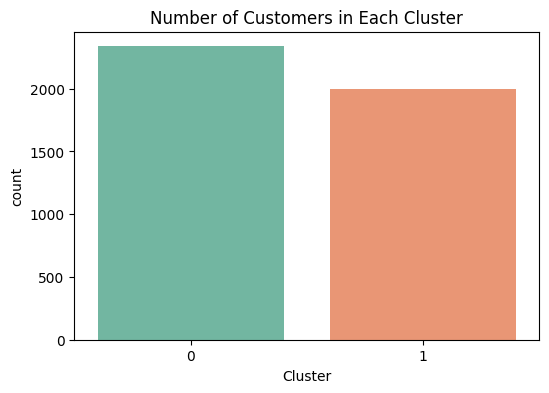

In [337]:
plt.figure(figsize=(6,4))
sns.countplot(x="Cluster", data=rfm, palette="Set2")
plt.title("Number of Customers in Each Cluster")
plt.show()


In [339]:
# Merge cluster info back to the original dataset
df_with_clusters = df.merge(rfm[["CustomerID", "Cluster"]], on="CustomerID", how="left")

# Preview
print(df_with_clusters.head())

segment_map = {
    0: "Loyal Frequent Buyers",
    1: "VIP Big Spenders",
    2: "Occasional Shoppers",
    3: "Churned Customers"
}
rfm["Segment"] = rfm["Cluster"].map(segment_map)

# Merge segments too
df_with_clusters = df.merge(rfm[["CustomerID", "Cluster", "Segment"]], on="CustomerID", how="left")


df_with_clusters.to_csv("Retail_with_Clusters.csv", index=False)


  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55       17850   
1    536365     71053         6 2010-12-01 08:26:00       3.39       17850   
2    536365    84406B         8 2010-12-01 08:26:00       2.75       17850   
3    536365    84029G         6 2010-12-01 08:26:00       3.39       17850   
4    536365    84029E         6 2010-12-01 08:26:00       3.39       17850   

          Country  TotalPrice    Month  Cluster  
0  United Kingdom       15.30  2010-12        1  
1  United Kingdom       20.34  2010-12        1  
2  United Kingdom       22.00  2010-12        1  
3  United Kingdom       20.34  2010-12        1  
4  United Kingdom       20.34  2010-12        1  
